#Section 3: Feed Forward NN

In [1]:
import torch
import torch.nn as nn
import torchvision # for datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
input_size = 784 # 28X28 images
hidden_size = 100
num_classes = 10 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST dataset from pytorch
train_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = True, transform = transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/drive/MyDrive/AI-Internship/MNIST', train = False, transform = transforms.ToTensor(),download=True)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [5]:
print(f'length of train_dataset is : {len(train_dataset)} and length of train_loader is : {len(train_loader)}')
print(f'length of test_dataset is : {len(test_dataset)} and length of test_loader is : {len(test_loader)}')

length of train_dataset is : 60000 and length of train_loader is : 600
length of test_dataset is : 10000 and length of test_loader is : 100


Let's take a look at one batch of this dataset.

In [6]:
examples = iter(train_loader)
#unpack examples
samples , labels = examples.next()
print(f'samples shape : {samples.shape} ,labels shape : {labels.shape}')

samples shape : torch.Size([100, 1, 28, 28]) ,labels shape : torch.Size([100])


Let's plot 6 images of this batch.

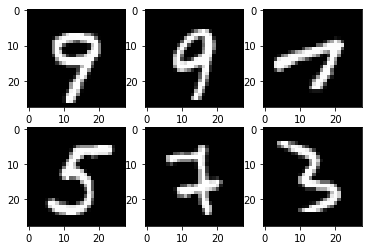

In [7]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='gray')

In [8]:
class NeuralNet(nn.Module):

  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)
  
  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [9]:
# create model
model_mnist = NeuralNet(input_size,hidden_size,num_classes)

# create loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_mnist.parameters(), lr= learning_rate)

total_input = len(train_loader)

###Train the model

In [10]:
list = []

for epoch in range(num_epochs):
  for i, (image, label) in enumerate(train_loader):
    # shape of image is 100,1,28,28 , we want to reshape it to 100, 784
    image = image.reshape(-1, 784)

    # forward pass
    y_pred_mnist = model_mnist(image)
    loss = criterion(y_pred_mnist, label)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch : {epoch+1}/{num_epochs} , step : {i+1}/{total_input}, loss : {loss.item():.4f} ')
      list.append([epoch+1,i+1, loss.item()])

epoch : 1/2 , step : 100/600, loss : 0.4760 
epoch : 1/2 , step : 200/600, loss : 0.3044 
epoch : 1/2 , step : 300/600, loss : 0.3009 
epoch : 1/2 , step : 400/600, loss : 0.3163 
epoch : 1/2 , step : 500/600, loss : 0.2030 
epoch : 1/2 , step : 600/600, loss : 0.2339 
epoch : 2/2 , step : 100/600, loss : 0.2388 
epoch : 2/2 , step : 200/600, loss : 0.1098 
epoch : 2/2 , step : 300/600, loss : 0.1131 
epoch : 2/2 , step : 400/600, loss : 0.1137 
epoch : 2/2 , step : 500/600, loss : 0.1801 
epoch : 2/2 , step : 600/600, loss : 0.2831 


###Test the model

In [17]:
# we don't calculate gradient in this phase

with torch.no_grad():
  n_true = 0
  n_total = 0

  for image_test, label_test in test_loader:
    
    image_test = image_test.reshape(-1,784)
    output = model_mnist(image_test)

    _, y_pred_test = torch.max(output,1)
    n_true += (y_pred_test == label_test).sum()
    n_total += label.size(0)


print(f'accuracy of model on the 10000 images is : {(n_true/n_total) *100}')


accuracy of model on the 10000 images is : 95.5


In [18]:
print(list)

[[1, 100, 0.47603169083595276], [1, 200, 0.30441272258758545], [1, 300, 0.30087122321128845], [1, 400, 0.3163400888442993], [1, 500, 0.2030360996723175], [1, 600, 0.2339235544204712], [2, 100, 0.23879747092723846], [2, 200, 0.10976012051105499], [2, 300, 0.11312120407819748], [2, 400, 0.1137070432305336], [2, 500, 0.18006904423236847], [2, 600, 0.2831461429595947]]


In [24]:
len(list)

12

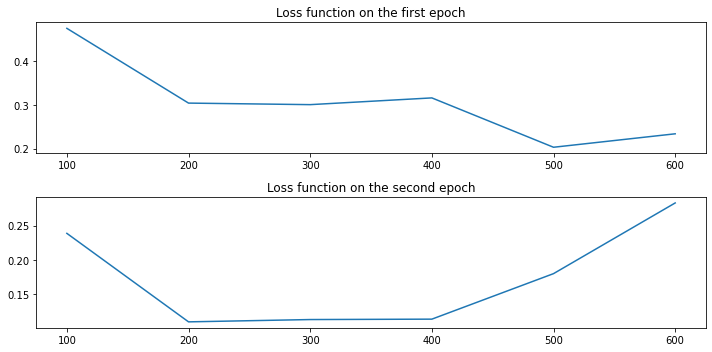

In [31]:
import seaborn as sns
fig, axs = plt.subplots(2,1,figsize =(10, 5))
axs[0].set_title("Loss function on the first epoch")
sns.lineplot(x = [list[i][1] for i in range(6)] , y = [list[i][2] for i in range(6)], ax = axs[0])
axs[1].set_title("Loss function on the second epoch")
sns.lineplot(x = [list[i][1] for i in range(6,len(list))] , y = [list[i][2] for i in range(6,len(list))], ax = axs[1])
plt.tight_layout()